<a href="https://colab.research.google.com/github/lceballosa/proyectoDiscretas2/blob/master/Algoritmo_Montgomery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo de Mongomery para la eficiencia en sistemas de Cryptografía
*Presentado por Juan David González Muñoz y Laura Valentina Ceballos Aguilar*

# Introducción

Hoy en día,  con el rápido crecimiento de la información y el desarrollo de diferentes sistemas de hackeo como los son el pishing, el ataque DDOS entre otros$_{[1]}$ el tema de la ciberseguridad ha aumentado su complejidad tomando como base diferentes algoritmos que implementan la aritmética modular, más específicamente la multiplicación y la división$_{[2]}$. Tal es el caso del sistema de encriptación  Rivest, Shamir, and Adleman (RSA)  que además de implementar la aritmética modular, toma la exponenciación usando números primos de gran valor$_{[3]}$ y por lo tanto requiere de grandes cantidades de multiplicaciones modulares para llegar al cálculo de la exponenciación$_{[2]}$. Realizar esta gran cantidad de operaciones exige un hardware más rápido y dedicado a este tipo de operaciones que consumiría gran cantidad de energía en el procesamiento, lo cual resulta no ser efectivo para aquellos dispositivos móviles que poseen una limitación de bateria$_{[2]}$.
Dado que la división modular que se realizar para hallar el valor es la que más consume tiempo y energía, el Algoritmo de Montgomery brinda la manera de evitar estas divisiones y llegar al resultado mucho más rápido que el algoritmo estandar$_{[4]}$. Para ello, el método de Montgomery se basa la propiedad de la aritmética modular que indica:

\begin{equation}
c\space mod\space p = c + (N\cdot p)\space mod\space p 
\end{equation}\
Sin importar cuantas veces se le sume p. Por lo tanto, el Algoritmo de Montgomery busca hallar la cantidad que se de debe sumar a la expresión para que esta pueda ser dividida fácilmente por un factor $R$ el cual debe ser primo relativo a $p$ y mayor a él. Por lo general $R= 2^m$ donde m generalmente se toma como el número de bits soportados por la máquina$_{[5]}$. De esta manera, la reducción de Montgomery tan solo tendrá que tomar el valor y le reducir los bit menos significativos y tan solo bastará con llevar los valores que se multiplicarán a la base de Montgomery y ejecutar el procedimiento que se explicará posteriormente.

# Estado del arte

A lo largo de la consulta de estudios propios del uso del algoritmo de Montgomery y su uso en criptografía se obtuvieron diferentes tipos de investigación que verifican la eficiencia a la hora de realizar este tipo de implementaciones.  

En primer lugar el estudio realizado por el   *Global Colloquium in Recent Advancement and Effectual Researches in Engineering, Science and Technology (RAEREST 2016)* en donde se lleva a cabo una investigacion acerca de la implementación estandar del sistema de encriptado por RSA, y como este puede ser eficazmente implementado usando la multipliación por Montgomery. Para la realización de este algoritmo se tomó en cuenta la trasformación de los elementos al dominio de Montgomery, la selección de un  $R= 2^w > M$ donde $w$ será la longitud de la palabra y $M$ el módulo el cual debe ser impar, de esta manera se tienen presentes todos los parámetros que se deben tener el cuenta en los sistemas de criptografía.
Además de ello, el estudio parte de la base de la trasformación de los elementos al dominio de Montgomery y así realizarles la respectiva reducción, en donde se toman en cuenta diferentes parámetros para la reducción de los bits menos significativos y su posterior multiplicación.
Con la realización del algoritmo (tanto la reducción de los valores como la multiplicación de ellos) se demostró que el algoritmo efectivamente consume menos cantidad de energía empleando Xilinx, el cual es un FPGA al cual se le incorporó el algortimo, para obtener de esta manera una reducción del 78% del tiempo en comparación a un algortimo convecional$_{[2]}$.

Como segunda investigación, se encontró la realizada por la universidad de Manchester en donde se muestra la efectividad del uso de este algoritmo en la aplicación de sistemas de encriptación como el RSA. A su vez, esta investigación lleva a cabo la realización del algoritmo tomando en cuenta las respectivas operaciones de transformación para llevar a cabo el algoritmo y de esta manera se llega a la conclusion de que el sistema resulta ser en gran medida efectivo para la realización de estas operaciones, llegando a demostrar que nunca será necesario la realización de extracciones para hallar el valor de la operación ya que precisamente es este algortimo el que nos permite evitar estas operaciones costosas$_{[6]}$.

# Materiales y métodos

##  Descripción matemática de los métodos:

Para la correcta realización del método de Montgomery es indispensable tener en cuenta las trasnformaciones y selecciones que se deben realizar. Por lo tanto es indispensable saber:


1.   $m$ será un entero positivo
2.   $R$ será un entero estrictamente mayor que $m$ y su $gcf\space (m,R)=1$
3.   $T$ sera un valor entre $0< T< mR$
4.   $x,y$ serán valores enteros mayores que $m$
    Ahora, para la trasformación al dominio de Montgomery se tendrá en cuenta:

\begin{equation}
x'=xR\space mod\space m\\
y'=yR\space mod\space m
\end{equation}\
    Dado que se quiere enfocar en los sistemas de encriptación, el valor para $m$ deberá ser impar y el valor de $R$ será  $R=2^n$ una potencia de 2, así también se garantizará que $gcf(R,m)=1$

Así, la reducción de Montgomery se ejecutará teniendo en cuenta:
$$
x'y'= x'y'R^{-1}(mod m)
= xyR(mod m)
$$
Para ilustrar la relación anterior se tomará en cuenta:
$$
x^{5}(mod m)
$$
El algoritmo hará la redución de $x'*x'= X'^{2}R^{-1}(mod m)=A$
Luego, la reducción de $A^{2}$ será 

$$A^{2}R^{-1}(mod m)= x'^{4}R^{-3}(mod m)$$
y la reducción de 
$$A^{2}R^{-1}(mod m)*x'= x'^{5}*R^{-4}(mod m)= x^{5} mod m$$
Por lo tanto, si este valor se multiplica por R^{-1}(mod m) y se reduce por el módulo, el resultado será $x^{5}(mod m)$
\
\
Demostración reducción de Montgomery:
Dada un m tal que $gcf(m,R)=1$
  \begin{equation}
m'=-m'\space mod\space R\\
\end{equation}\
  Y un $T$ tal que 
  $$
  0 < T < mR
  $$
  y 
  $$
  U=Tm´(mod R)
  $$
  Entonces $$\frac{(T+Um)}{R}$$ será un entero y $$\frac{(T+Um)}{R} = TR^{-1} mod m$$ 
* Demostración:
Dado que 
$$
T + Um \equiv T mod m 
$$
Entonces 
$$
(T+Um)R^{-1}\equiv TR^{-1}(mod m) 
$$
\
y por lo tanto, para ver que $(T+Um)R^{-1} \in Z$ nos basaremos en $U$ puede ser representado como:
$$
U= Tm'+kR
$$
y
$$
m'm=-1+lR
$$
Para $l$ y $k$ como valores enteros.

Reemplazando en $(T+Um)R^{-1}$ se logrará llegar a:
\
\
  \begin{equation*}
\frac{(T+Um)}{R}= lT+km \in Z
\end{equation*}
La demostración anterior implicará que si todos los enteros se representan de la forma $R=2^{n}$ entonces $TR^{-1}(mod m)$ podrá ser rápidamente computado implementando dos multiplicaciones de precisión, estas multiplicaciones estarán dadas dependiendo el tipo de operación que se quiera realizar, además de ello, también implicaría mayor rendimiento implementando deplazamientos a la derecha del valor $(T+Um)$ esto con el fin de dividir entre el factor de R , en este caso, base 2 y teniendo en cuenta el factor fundamental de este algoritmo, como lo es la suma de un factor que nos permita llegar rápidamente al valor.

Estos desplazamientos se realizaran a los valores en sistema binario, tomando en cuenta las secuencia de reducciones que se tendrán que ir realizando, esto con el fin de lograr recuencialmente la solución y evitar a toda costa las múltiples divisiones que se conocen para el algoritmo convecional del modulo $_{[7]}$.

Las dos multiplicaciones de presición implementadas para la exponenciación serán:
\
\
$$
R(mod m)*R(mod m)
$$
y 
$$
R(mod m)*x'
$$
\
Esto se puede ver con el ejemplo ilustrado anteriormente.
Teniendo en cuenta las anteriores implicaciones, se podrá llevar a cabo el correcto algoritmo que permita realizar la reducción de los parámetros iniciales y además de ello, permitirá realizar los correctos desplazamientos mediante la reducción contunia de las multiplicaciones implementadas$_{[7]}$.


## Algoritmo: 




In [ ]:
from time import time
class Montgomery:
    BASE = 2
 
    def __init__(self, m):
        self.m = m
        self.n = m.bit_length()
        #self.rrm= Rmodm ya que 1<<(self.n*2)%m= (1*2^200)%m= b^n*2 mod m
        self.rrm = (1 << (self.n * 2)) % m
 
    def reduce(self, t):
        a = t
        for i in range(self.n):
            #compara el ultimo bit del numero, si este es impar le suma m
            if (a & 1) == 1:
                a = a + self.m
            #divide el resultado entre 2 ya que esta es la base elegida
            a = a >> 1
        #si al terminar el ciclo con las reducciones el número resulta mayor que m 
        #se debe restar m para que se cumpla la propiedad de que 1<x<m
        if a >= self.m:
            a = a - self.m
        #retorna el valor el base montgonery (reducido)
        return a
 
# Main
print("Programa que calcula la exponenciación modular de dos números teniendo en cuenta, los parámetros requeridos para la encriptación")
print("Presentado por Juan David González Muñoz y Laura Valentina Ceballos Aguilar")
print("Para la realización del algoritmo se tomó en cuenta el algoritmo de montgomery aplicado a la reducción de bits de los númeoros")

m=int(input("Ingrese m (módulo impar): "))
print("Ingrese la base tal que base > 0")
x1 = int(input("Ingrese la base: "))
print("Ingrese el exponente tal que exponente > m")
x2 = int((input("Ingrese el exponente: "))) 
mont = Montgomery(m)
#Cambio a base de montgomery x'=xRmodm
t1 = x1 * mont.rrm
t2 = x2 * mont.rrm
#Se reduce el primer valor
r1 = mont.reduce(t1)
#Se reduce el segundo valor
r2 = mont.reduce(t2)
#r = 1 << mont.n

print ("b : ", str(Montgomery.BASE))
print ("n : ", str(mont.n))
print ("m : ", str(mont.m))
print ("t1: ", str(t1))
print ("t2: ", str(t2))
print ("redución base: ", str(r1))
print ("reducción exponente: ", str(r2))
print ("\nMontgomery computation of x1 ^ x2 mod m:")
start_time = time()
print("Según el algoritmo tomado por HandBook Applied to Cryptografy")
#prod= Rmodm
prod = mont.reduce(mont.rrm)
#base= reducir(x1* R^2 modm=mont.rrm)
base = mont.reduce(x1 * mont.rrm)
exp = x2
"""Una vez todos los valores se encuentren reducidos, solo bastará como realizar 
la reducción a los valores ya reducidos"""
#reducción de bits
#mientras que la cadena de bit del exponente sea mayor que 0
while exp.bit_length() > 0:
    """si el último bit del exponente es 1 (exp impar) se reduce el producto por
    la base , es decir x1 (pero reducida)"""
    if (exp & 1) == 1:
        #hará la reducción aplicando una de las multiplicaciones precisas para la exponenciación
        prod = mont.reduce(prod * base)
    #divide el resultado entre 2 , por la base 2
    exp = exp >> 1
    #reduce la base  
    base = mont.reduce(base * base)
#Devolverá el valor en el dominio inicial
elapsed_time = time() - start_time
print("\nMontgomery computation of", x1,"^",x2," mod ",m,"=",mont.reduce(prod))
print("El tiempo de ejecución fue de ",elapsed_time, "segundos")
print("Los tiempos de ejecución cambiarán notoriamente efectuando la misma operación desde la aritmetica modular conocida")

start_time = time()
#Cálculo de la potencia paso a paso: 
# x= x1**x2
x=x1
for i in range (x2-1):
    x*=x1
x=x % m

if(x<m):
    print("\nAlternate computation of", x1,"^",x2," mod ",m,"=", x)    
else:
    while(x>=m):
        x-=m
    print("\nAlternate computation of", x1,"^",x2," mod ",m,"=", x)

elapsed_time = time() - start_time
print("El tiempo de ejecución fue de ",elapsed_time, "segundos")
# #print(pow(x1, x2, m))

Programa que calcula la exponenciación modular de dos números teniendo en cuenta, los parámetros requeridos para la encriptación
Presentado por Juan David González Muñoz y Laura Valentina Ceballos Aguilar
Para la realización del algoritmo se tomó en cuenta el algoritmo de montgomery aplicado a la reducción de bits de los númeoros
Ingrese m (módulo impar): 1503
Ingrese la base tal que base > 0
Ingrese la base: 2009
Ingrese el exponente tal que exponente > m
Ingrese el exponente: 2000
b :  2
n :  11
m :  1503
t1:  1876406
t2:  1868000
redución base:  721
reducción exponente:  325

Montgomery computation of x1 ^ x2 mod m:
Según el algoritmo tomado por HandBook Applied to Cryptografy

Montgomery computation of 2009 ^ 2000  mod  1503 = 346
El tiempo de ejecución fue de  0.0003018379211425781 segundos
Los tiempos de ejecución cambiarán notoriamente efectuando la misma operación desde la aritmetica modular conocida

Alternate computation of 2009 ^ 2000  mod  1503 = 346
El tiempo de ejecución 

##   Configuración experimental:

Para llevar a cabo la prueba se tomarán los tiempos de ejecución de dos bloques de código. El primero ejecuta el algoritmo de Montgomery con el fin de obtener el resultado de una potencia en un modulo impar. El segundo realizara el mismo procedimiento, pero esta vez se realizará paso a paso, lo que quiere decir que se calculará la potencia haciendo todas las multiplicaciones necesarias y continuación se sacara el módulo del número resultante.

Con el fin de tener datos mas concretos, se realizará la medida de tiempos en 5 diferentes ocasiones bajo las mismas circunstancias, promediando cada dato en uno solo con el fin de graficar el comportamiento al mismo tiempo que se compara al procedimiento paralelo.

Las potencias seleccionadas para realizar las pruebas son

Potencias de 2:\
$2^{5}, 2^{10}, 2^{15}, 2^{20}, 2^{25}, 2^{30}, 2^{35}$ 

Potencias de 3:\
$3^{3}, 3^{6}, 3^{9}, 3^{12}, 3^{15}, 3^{18} 3^{21}$ 

Potencias de 5:\
$5^{5}, 5^{10}, 5^{15}, 5^{20}, 5^{25}, 5^{30}, 5^{35}$ 

Todos los resultados se darán bajo el módulo de 151

Para realizar las pruebas se uso el backend de Google compute Engine en Python 3, el cual dispone de 12.72 GB de RAM y 107.77 GB en Disco


#Resultados

In [ ]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()

Saving Gráfica resultados 3.png to Gráfica resultados 3.png


## Potencias de 2

Tablas de toma de tiempos para las potencias de 2 con el algoritmo de Montgomery y uno alternativo (paso a paso)

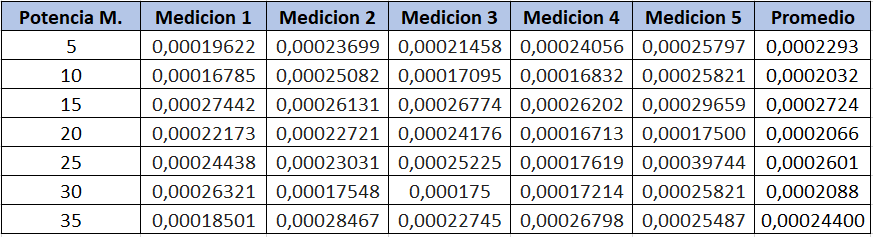

In [ ]:
Image("Tabla promedio Montgomery 1 (1).png")

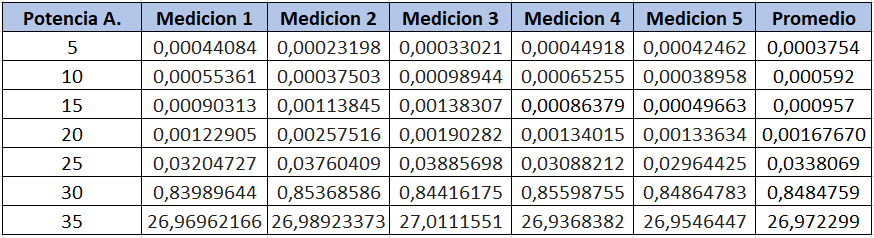

In [ ]:
Image("Tabla promedio Alternative 1.png")

Tabla de promedios de mediciones para potencias de 2 en los algoritmos de Montgomery y alternativo (paso a paso)

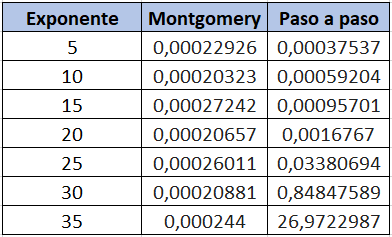

In [ ]:
Image("Resultados 1.png")

Gráfica comparativa del tiempo de ejecucion en segundos de los 2 tipos de algoritmos bajo el módulo 151

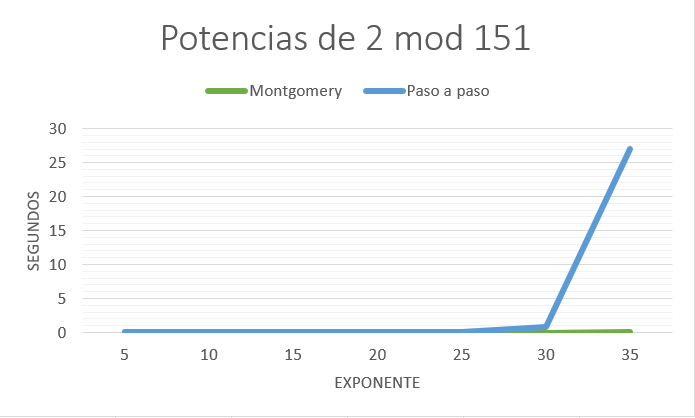

In [ ]:
Image("Gráfica resultados 1.png")

## Potencias de 3

Tablas de toma de tiempos para las potencias de 3 con el algoritmo de Montgomery y uno alternativo (paso a paso)

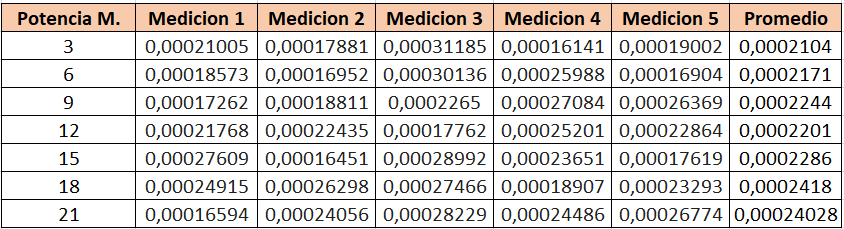

In [ ]:
Image("Tabla promedio Montgomery 2.png")

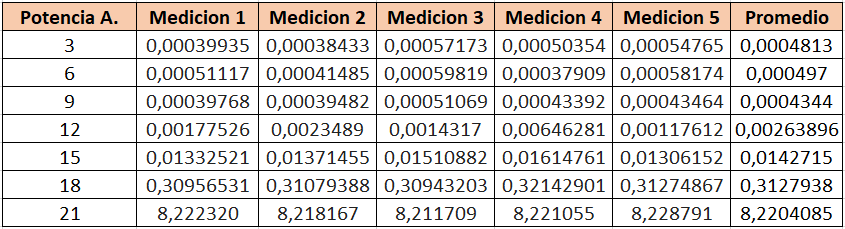

In [ ]:
Image("Tabla promedio Alternative 2.png")

Tabla de promedios de mediciones para potencias de 3 en los algoritmos de Montgomery y alternativo (paso a paso)

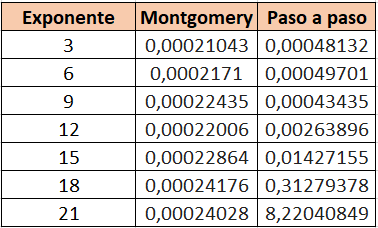

In [ ]:
Image("Resultados 2.png")

Gráfica comparativa del tiempo de ejecución en segundos de los dos tipos de algoritmos bajo el módulo 151

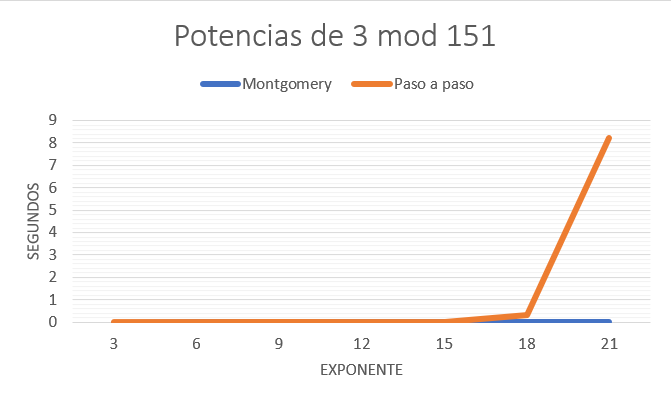

In [ ]:
Image("Gráfica resultados 2.png")

##Potencias de 5

Tablas de toma de tiempos para las potencias de 5 con el algoritmo de Montgomery y uno alternativo (paso a paso)

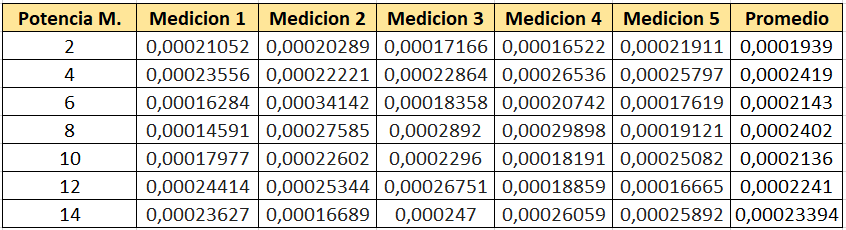

In [ ]:
Image("Tabla promedio Montgomery 3.png")

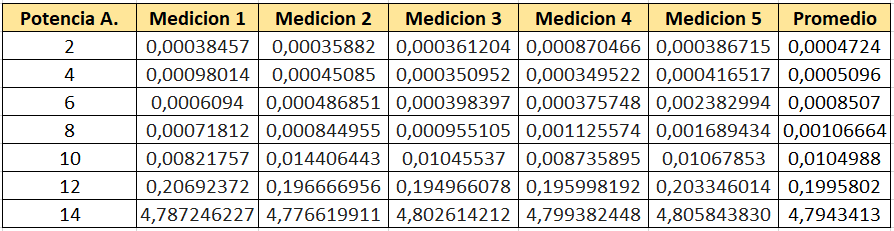

In [ ]:
Image("Tabla promedio Alternative 3.png")

Tabla de promedios de mediciones para potencias de 5 en los algoritmos de Montgomery y alternativo (paso a paso)

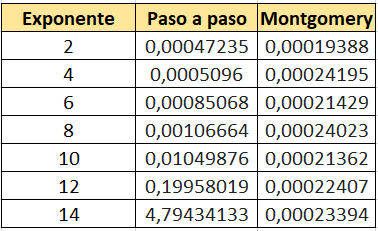

In [ ]:
Image("Resultados 3.png")

Gráfica comparativa del tiempo de ejecución en segundos de los dos tipos de algoritmos bajo el módulo 151

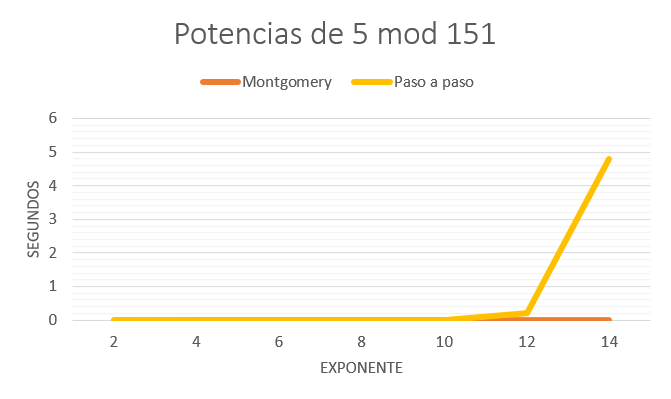

In [ ]:
Image("Gráfica resultados 3.png")

#Conclusiones

Las máquinas de cómputo son una gran herramienta para el desarrollo tecnológico ya que permiten ahorrar tiempo a la hora de realizar cálculos complejos e incluso llegar a cifras en las que de otra manera seria imposible llegar, por esto es necesario tener claro la manera en la que deben ser instruidas por medio de algoritmos que cumplen funciones específicas en muchas áreas de desarrollo.

En muchas ocasiones puede llegar a considerarse que la potencia de cómputo es un gran aliado a la hora de realizar procesos de cálculo. Pero es claro que a través de algoritmos que están basados en el análisis de comportamientos repetitivos, es posible hallar patrones que permiten realizar cálculos que, de otra manera, serian imposibles debido a la escala de las cifras que se manejan e incluso en algunos otros casos tiene la capacidad de reducir los tiempos de ejecución, aumentando así el alcance en la aplicación de los modelos matemáticos, permitiendo que la potencia de cómputo sea usada en puntos mas complejos en el campo de la investigación.

Gracias al método de Mongomery se pudo observar como los tiempos de procesamiento disminuyen en gran medida y por lo tanto este algoritmo puede llegar a ser implementado en todo tipo de sistemas de encriptación,como se mostró en el programa implementado anteriormente, pues, con la llegada de la cuarta revolución industrial, la creación de millones de datos y la evolución en los sistemas de hackeo es importante llevar a cabo todo tipo de encriptaciones de una manera y eficaz. 


#Referencias

[1] (https://www.bbc.com/mundo/noticias-42069944)

[2] (https://reader.elsevier.com/reader/sd/pii/S2212017316304704?token=D6871CF8E8FEF55EA277D77CAB6A2DACF410C22976C3180FABFC9DC0BC9BB07408CC52B69D65F7659DFBEEC229F3C08C)

[3] (https://www.researchgate.net/profile/Qasem_Abu_Al-Haija/publication/263465592_Efficient_FPGA_Implementation_of_RSA_Coprocessor_Using_Scalable_Modules/links/53f3260f0cf2dd48950c9454/Efficient-FPGA-Implementation-of-RSA-Coprocessor-Using-Scalable-Modules.pdf)

[4] (https://doc-00-0c-apps-viewer.googleusercontent.com/viewer/secure/pdf/av4fln40v9jorqu7pdpitp5qvq35oqsv/oigc954b20e0oeqi7i86d8f44magbeva/1606757100000/drive/08075938750262386636/ACFrOgBN0Lp70cNHVwfs6Yg9nmR-LD-KLDTtA1CvFyIvDYW25kD_yAwjTdLzbUoFCKeE5ecVq6pPlSWuu2t0GvCwZFQhMMbbclRPllSZ2p6IhzXMBE0mWmYi6uxXQPEmD-g53T3Jb8sUbroBAsRv?print=true&nonce=kk2u432tc5nje&user=08075938750262386636&hash=or8m43bjp7k9kpavsi66k56rmp2iss21)

[5] (https://www.tamps.cinvestav.mx/~mmorales/documents/gfpMultiplication.pdf)

[6] (https://pdfs.semanticscholar.org/0e6a3e8f30b63b556679f5dff2cbfdfe9523f4fa.pdf)

[7] (http://cacr.uwaterloo.ca/hac/about/chap14.pdf)